# How to create LCC grids

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

This corresponds to a regular grid for CALIOPE IP

In [3]:
projection='lcc'
lat_1 = 37
lat_2 = 43
lon_0 = -3
lat_0 = 40
nx = 397
ny = 397
inc_x = 4000
inc_y = 4000
x_0 = -807847.688
y_0 = -797137.125

In [4]:
nessy = create_nes(comm=None, info=False, projection=projection,
                   lat_1=lat_1, lat_2=lat_2, lon_0=lon_0, lat_0=lat_0, 
                   nx=nx, ny=ny, inc_x=inc_x, inc_y=inc_y, x_0=x_0, y_0=y_0)

In [5]:
nessy.to_netcdf('lcc_grid.nc', info=True)

Rank 000: Creating lcc_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Read projection

In [6]:
nessy.projection

Proj('+proj=lcc +lat_0=40 +lon_0=-3 +lat_1=37 +lat_2=43 +x_0=0 +y_0=0 +R=6356752.3142 +units=m +no_defs', preserve_units=True)

In [7]:
nessy.projection_data

{'grid_mapping_name': 'lambert_conformal_conic',
 'standard_parallel': [37, 43],
 'longitude_of_central_meridian': -3,
 'latitude_of_projection_origin': 40,
 'x_0': -807847.688,
 'y_0': -797137.125,
 'inc_x': 4000,
 'inc_y': 4000,
 'nx': 397,
 'ny': 397}

## 2. Plot

In [8]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-11.58393 32.47507, -11.54169 32.478..."
1,"POLYGON ((-11.54169 32.47851, -11.49944 32.481..."
2,"POLYGON ((-11.49944 32.48192, -11.45719 32.485..."
3,"POLYGON ((-11.45719 32.48533, -11.41494 32.488..."
4,"POLYGON ((-11.41494 32.48871, -11.37268 32.492..."
...,...
157604,"POLYGON ((6.95490 46.70274, 7.00684 46.69873, ..."
157605,"POLYGON ((7.00684 46.69873, 7.05878 46.69470, ..."
157606,"POLYGON ((7.05878 46.69470, 7.11071 46.69066, ..."


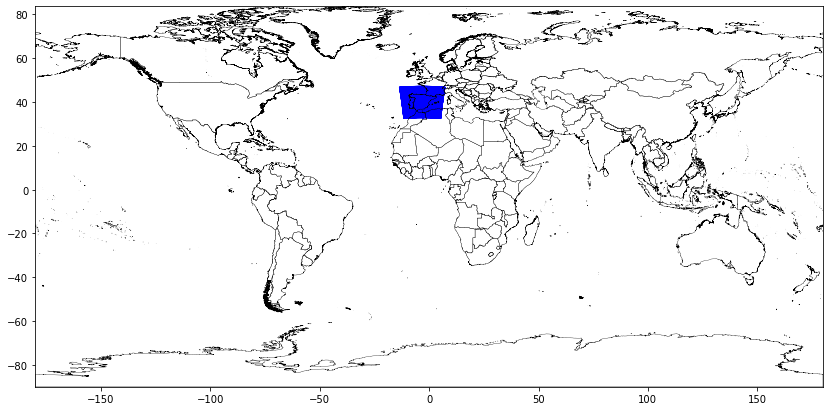

In [9]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor='blue', edgecolor='blue')
countries = gpd.read_file('/esarchive/shapefiles/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [10]:
nessy.to_netcdf('lcc_grid.nc')

### Write shapefile

In [11]:
nessy.to_shapefile('lcc_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
